In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
df = pd.read_csv("FAB1_6AD.csv")
df

,date,strain,time,number,rapa,dots,cells,condition
0,130624,1287,0,1,0,2,66,1
1,130624,1287,0,1,0,0,43,1
2,130624,1287,0,1,0,2,56,1
3,130624,1290,0,1,0,3,57,7
4,130624,1290,0,1,0,5,50,7
...,...,...,...,...,...,...,...,...
72,190624,1290,120,3,0,25,62,8
73,190624,1290,120,3,0,24,57,8
74,190624,1299,120,3,0,5,83,5
75,190624,1299,120,3,0,6,61,5


In [3]:
df.columns

Index(['date', 'strain', 'time', 'number', 'rapa', 'dots', 'cells',
       'condition'],
      dtype='object')

In [4]:
# calculate SE / cells (%)
df_number = df.groupby(["condition", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,condition,number,date,strain,time,rapa,dots,cells,SE
0,1,1,391872,3861,0,0,4,165,2.424242
1,1,2,571872,3861,0,0,7,141,4.964539
2,1,3,571872,3861,0,0,11,137,8.029197
3,2,1,261248,2574,240,0,29,158,18.354430
4,2,2,571872,3861,360,0,38,151,25.165563
5,2,3,571872,3861,360,0,31,161,19.254658
6,3,1,261248,2574,240,400,5,144,3.472222
7,3,2,571872,3861,360,600,14,162,8.641975
8,3,3,571872,3861,360,600,5,146,3.424658
9,4,1,391872,3897,0,0,0,149,0.000000


In [5]:
# calculate mean and SEM for each condition
SE_mean = df_number.groupby("condition").mean()["SE"].values
SE_sem = df_number.groupby("condition").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

[ 5.13932617 20.92488389  5.17961836  0.84291188  7.98858121  1.59601469
 16.22802192 49.29189356  5.59388832]
[1.62036951 2.13620548 1.73123293 0.42664861 1.18370592 0.8114728
 4.39402598 5.8238975  1.11589687]


## Paired t-test corrected with Holm-Sidak

In [6]:
SE_0 = df_number[df_number["condition"] == 1]["SE"]
SE_1 = df_number[df_number["condition"] == 2]["SE"]
SE_2 = df_number[df_number["condition"] == 3]["SE"]
SE_3 = df_number[df_number["condition"] == 4]["SE"]
SE_4 = df_number[df_number["condition"] == 5]["SE"]
SE_5 = df_number[df_number["condition"] == 6]["SE"]
SE_6 = df_number[df_number["condition"] == 7]["SE"]
SE_7 = df_number[df_number["condition"] == 8]["SE"]
SE_8 = df_number[df_number["condition"] == 9]["SE"]

In [7]:
statistic, wt_rapa_pvalue = stats.ttest_rel(SE_1, SE_2)
wt_rapa_pvalue

0.0009115932030029872

In [8]:
statistic, wt_6a_pvalue = stats.ttest_rel(SE_1, SE_4)
wt_6a_pvalue

0.005386819179518162

In [9]:
statistic, wt_6d_pvalue = stats.ttest_rel(SE_1, SE_7)
wt_6d_pvalue

0.01656603633370576

In [10]:
statistic, a_rapa_pvalue = stats.ttest_rel(SE_4, SE_5)
a_rapa_pvalue

0.029124989756786904

In [11]:
statistic, d_rapa_pvalue = stats.ttest_rel(SE_7, SE_8)
d_rapa_pvalue

0.022487306138931618

In [12]:
multipletests(pvals=[wt_rapa_pvalue, wt_6a_pvalue, wt_6d_pvalue, a_rapa_pvalue, d_rapa_pvalue], alpha=0.05, method="holm-sidak")

(array([ True,  True,  True,  True,  True]),
 array([0.00454966, 0.02137379, 0.04887935, 0.04887935, 0.04887935]),
 0.010206218313011495,
 0.01)

## data visualization

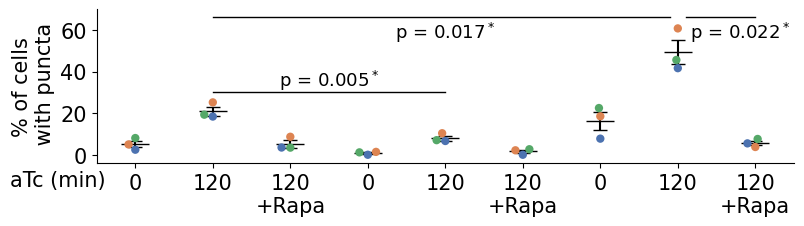

In [53]:
fontsize=15

fig, ax = plt.subplots(figsize = (9, 2), dpi=100)
sns.swarmplot(x="condition", y="SE", data=df_number, hue = "number", palette="deep", size=6)
ax.errorbar(x=list(range(9)), y=SE_mean, yerr=SE_sem, capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(-0.5, 8.5)
ax.set_ylim(-4, 70)

ax.plot([1, 4], [30, 30], color='k', lw=1)
ax.text(2.5, 33, f'p = {wt_6a_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)

ax.plot([1, 6.9], [66, 66], color='k', lw=1)
ax.text(4, 56, f'p = {wt_6d_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)

ax.plot([7.1, 8], [66, 66], color='k', lw=1)
ax.text(7.8, 56, f'p = {d_rapa_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)

ax.text(-1, -15, 'aTc (min)', fontsize=fontsize, ha='center')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(['0', '120', '120\n+Rapa', '0', '120', '120\n+Rapa', '0', '120', '120\n+Rapa'], fontsize=fontsize)
ax.set_xlabel("")
ax.set_yticks([0, 20, 40, 60])
ax.set_yticklabels(["0", "20", "40", "60"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

ax.legend().remove()
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()